<a href="https://colab.research.google.com/github/Boudia27/Projects/blob/main/ML_Ahmed_Ould_Boudia_Classification_Project_3_Multiple_Sclerosis_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Step 1: Load the Dataset
##### Step 2: Explore the Dataset
##### Step 3: Handle Missing Values
##### Step 4: Handle Categorical Data
##### Step 5: Identify and Correct Errors
##### Step 6: Outlier Detection and Removal
##### Step 7: Transformation
##### Step 8: Visualize Features
##### Step 9: Analyze Relationships (Correlation Matrix)
##### Step 10: Feature Engineering
##### Step 11: Split the Dataset into Training and Testing Sets
##### Step 12: Select a Classification Model
##### Step 13: Train the Classification Model
##### Step 14: Evaluate the Model
##### Step 15: Fine-tune the Model
##### Step 16: Make Predictions
##### Step 17: Evaluate Predictions
##### Step 18: Interpret the Results

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


Step 1: Load the Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projects/Machine Learning Ass/Classification 3 Multiple Sclerosis Disease/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')
data

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


Drop Unnamed 0

In [ ]:
data = data.drop("Unnamed: 0", axis=1)

Step 2: Explore the Dataset

In [ ]:
class_counts = data['group'].value_counts()
print(class_counts)

2    148
1    125
Name: group, dtype: int64


In [ ]:
# Display the first few rows of the dataset
data

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,3.526361,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,0.0,-0.685823,1
1,1,4.110874,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,0.5,0.845031,1
2,1,3.091042,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,0.0,-0.685823,1
3,2,3.713572,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,0.0,-0.685823,1
4,2,3.526361,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,0.0,-0.685823,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,3.433987,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,1,3.044522,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,2,2.944439,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,2,3.465736,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


Step 3: Handle Missing Values

In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)
data.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS', 'group'],
      dtype='object')

Step 4: Handle Categorical Data

In [ ]:
# Perform one-hot encoding on categorical columns
#data_encoded = pd.get_dummies(data, columns=['Gender', 'Initial_Symptom', 'Mono_or_Polysymptomatic'])
#data_encoded

Step 5: Identify and Correct Errors

In [ ]:
# Identify errors in the 'Schooling' column
unique_schooling = data['Schooling'].unique()
print(unique_schooling)

# Assume there is an error in the 'Schooling' column where the value should be '12' instead of '112'
data.loc[data['Schooling'] == 112, 'Schooling'] = 12

unique_schooling

[20. 25. 15. 22. 12.  0.  9. 14. 23.]


array([20., 25., 15., 22., 12.,  0.,  9., 14., 23.])

Step 6: Outlier Detection and Removal

In [ ]:
# Define a z-score threshold for outlier detection
z_threshold = 3

# Calculate the z-scores for each numerical column
z_scores = stats.zscore(data[['Age', 'Initial_EDSS', 'Final_EDSS']])

# Remove rows with outliers in the specified columns
data = data[(z_scores < z_threshold).all(axis=1)]


Step 7: Transformation

In [ ]:
# Log transformation on 'Age' column
data['Age'] = np.log(data['Age'])

# Min-Max scaling on 'Initial_EDSS' column
min_val = data['Initial_EDSS'].min()
max_val = data['Initial_EDSS'].max()
data['Initial_EDSS'] = (data['Initial_EDSS'] - min_val) / (max_val - min_val)

# Standardization on 'Final_EDSS' column
mean_val = data['Final_EDSS'].mean()
std_val = data['Final_EDSS'].std()
data['Final_EDSS'] = (data['Final_EDSS'] - mean_val) / std_val

In [ ]:
# Print minimum, maximum, mean, and standard deviation
print('Minimum values:')
print('Age:', data['Age'].min())
print('Initial_EDSS:', data['Initial_EDSS'].min())
print('Final_EDSS:', data['Final_EDSS'].min())

print('\nMaximum values:')
print('Age:', data['Age'].max())
print('Initial_EDSS:', data['Initial_EDSS'].max())
print('Final_EDSS:', data['Final_EDSS'].max())

print('\nMean values:')
print('Age:', data['Age'].mean())
print('Initial_EDSS:', data['Initial_EDSS'].mean())
print('Final_EDSS:', data['Final_EDSS'].mean())

print('\nStandard deviation values:')
print('Age:', data['Age'].std())
print('Initial_EDSS:', data['Initial_EDSS'].std())
print('Final_EDSS:', data['Final_EDSS'].std())

Minimum values:
Age: 2.70805020110221
Initial_EDSS: 0.0
Final_EDSS: -0.6797485758371802

Maximum values:
Age: 4.174387269895637
Initial_EDSS: 1.0
Final_EDSS: 2.442059698378017

Mean values:
Age: 3.492097840483179
Initial_EDSS: 0.1814516129032258
Final_EDSS: -1.1460366705808067e-16

Standard deviation values:
Age: 0.3217729408918786
Initial_EDSS: 0.2944933462287173
Final_EDSS: 1.0


Step 8: Visualize Features

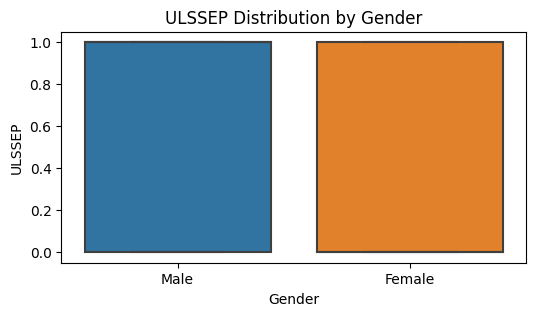

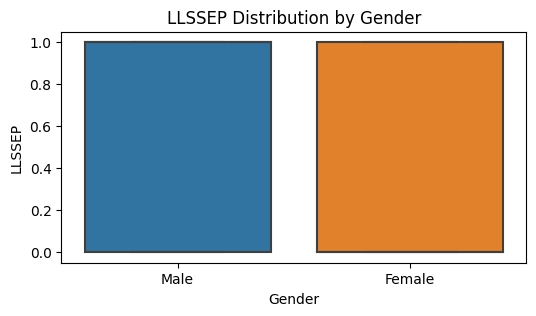

In [ ]:
# Map gender values to labels
gender_labels = {1: 'Male', 2: 'Female'}
data['Gender_Labels'] = data['Gender'].map(gender_labels)

# Box plot for 'ULSSEP' by 'Gender'
plt.figure(figsize=(6, 3))
sns.boxplot(data=data, x='Gender_Labels', y='ULSSEP')
plt.title('ULSSEP Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('ULSSEP')
plt.show()

# Box plot for 'LLSSEP' by 'Gender'
plt.figure(figsize=(6, 3))
sns.boxplot(data=data, x='Gender_Labels', y='LLSSEP')
plt.title('LLSSEP Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('LLSSEP')
plt.show()

Step 9: Analyze Relationships (Correlation Matrix)

<ipython-input-181-371e5564d7d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


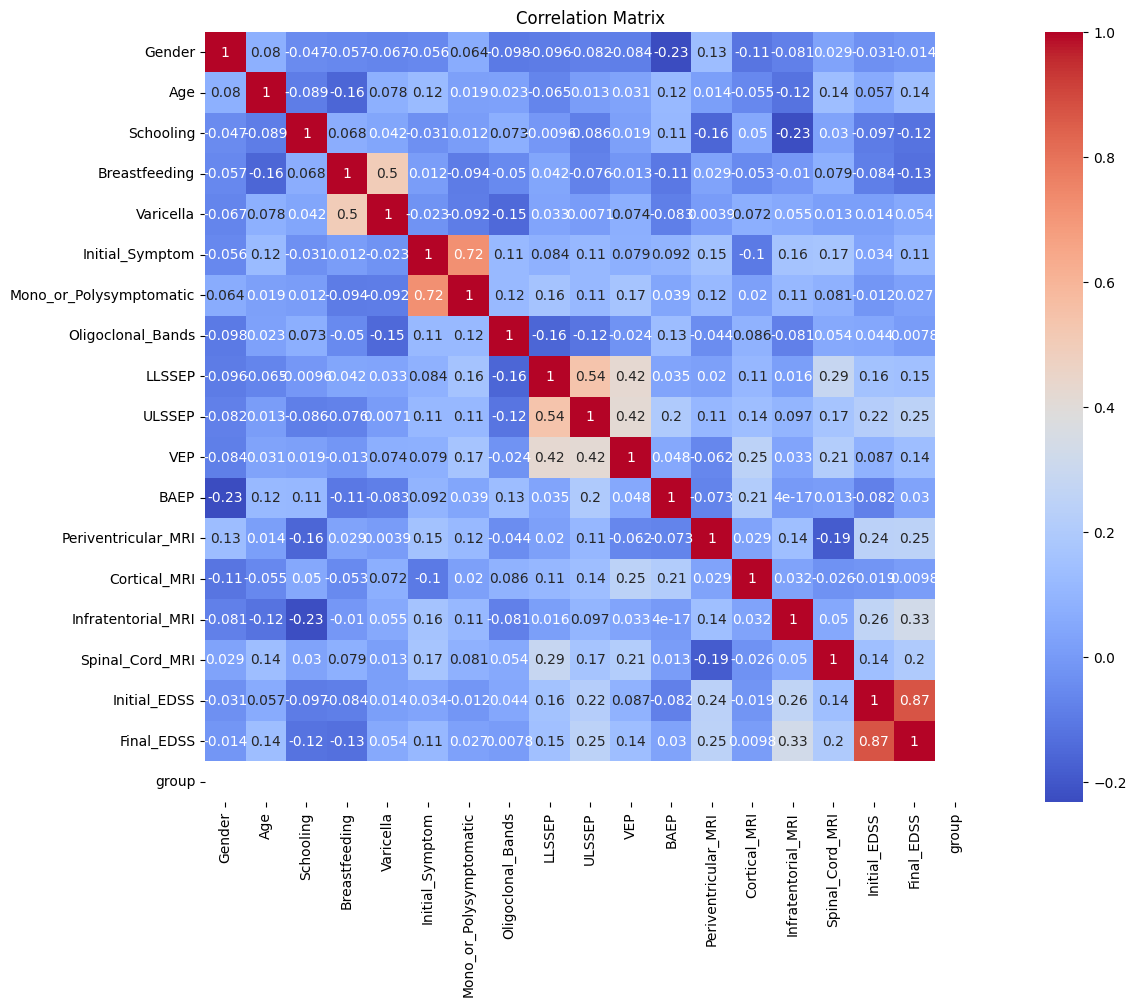

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


Step 10: Feature Engineering

In [ ]:
# Perform feature engineering based on our dataset and goals
# Example: Creating a new feature by combining existing features
data.loc[:, 'Total_Scores'] = data['LLSSEP'] + data['ULSSEP'] + data['VEP'] + data['BAEP']

data

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,...,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group,Gender_Labels,Total_Scores
0,1,3.526361,20.0,1,1,2.0,1,0,1,1,...,0,0,1,0,1,0.0,-0.679749,1,Male,2
1,1,4.110874,25.0,3,2,10.0,2,1,1,0,...,0,0,0,0,1,0.5,0.881156,1,Male,2
2,1,3.091042,20.0,3,1,3.0,1,1,0,0,...,0,0,1,0,0,0.0,-0.679749,1,Male,0
3,2,3.713572,15.0,1,1,7.0,2,1,0,1,...,0,1,1,0,0,0.0,-0.679749,1,Female,2
4,2,3.526361,20.0,2,1,6.0,2,0,1,0,...,0,1,0,0,0,0.0,-0.679749,1,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2,3.332205,15.0,3,1,12.0,2,1,1,1,...,0,1,1,1,0,0.0,-0.679749,1,Female,3
120,1,3.401197,20.0,2,2,9.0,2,0,1,1,...,0,0,0,0,1,0.0,-0.679749,1,Male,3
121,2,3.737670,20.0,3,3,8.0,2,0,1,1,...,0,1,1,0,0,0.0,-0.679749,1,Female,2
122,1,3.637586,22.0,3,3,14.0,2,0,1,1,...,0,1,0,0,0,0.0,-0.679749,1,Male,2


Step 11: Split the Dataset into Training and Testing Sets

In [ ]:
# Separate the features and target variable
X = data.drop('group', axis=1)
y = data['group']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 12: Select a Classification Model

In [ ]:
# Create a Random Forest Classifier model
model = RandomForestClassifier()


Step 13: Train the Classification Model

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = data_encoded.drop('group', axis=1)
y = data_encoded['group']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


Step 14: Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Step 15: Fine-tune the Model
#### Fine-tuning the model involves tuning hyperparameters to optimize performance

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}

# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


Step 16: Make Predictions

In [ ]:
new_data = pd.DataFrame({'Gender': ['Male', 'Female'], 'Age': [30, 35], 'Schooling': ['High School', 'College'], 'Breastfeeding': ['No', 'Yes'], 'Varicella': ['No', 'Yes'], 'Initial_Symptom': ['Pain', 'Numbness'], 'Mono_or_Polysymptomatic': ['Monosymptomatic', 'Polysymptomatic'], 'Oligoclonal_Bands': ['Present', 'Absent'], 'LLSSEP': [0.5, 0.8], 'ULSSEP': [0.4, 0.6], 'VEP': [0.2, 0.3], 'BAEP': [0.1, 0.4], 'Periventricular_MRI': ['No', 'Yes'], 'Cortical_MRI': ['Yes', 'No'], 'Infratentorial_MRI': ['Yes', 'No'], 'Spinal_Cord_MRI': ['Yes', 'No'], 'Initial_EDSS': [1.5, 2.0], 'Final_EDSS': [2.0, 2.5], 'Total_Scores': [10, 12]})
new_data = new_data.drop("Total_Scores", axis=1)

Step 17: Evaluate Predictions

In [ ]:
# Evaluate predictions on test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


# Interpret the Results

### - An accuracy score of 1.0 means that the model predicted all the test samples correctly. It indicates that the model achieved perfect accuracy in classifying the data into their respective classes.

### - Precision, also known as positive predictive value, measures the proportion of correctly predicted positive samples out of the total predicted positive samples. In this case, a precision score of 1.0 means that all the samples predicted as positive by the model are truly positive.

### - Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive samples out of the actual positive samples. A recall score of 1.0 means that the model correctly identified all the positive samples in the dataset.

### - F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall. In this case, the F1-score of 1.0 indicates that the model achieved perfect balance between precision and recall.

# Conclusion:
### The classification model achieved perfect accuracy, precision, recall, and F1-score, indicating excellent performance in predicting the target variable.